# Introduccion al Análisis de Regresión.

## Outline 
1. En el pizarrón daremos la prueba sobre la propiedad de cerradura bajo condicionamiento de la distribución normal multivariada. 

2. Usaremos la base de datos `Maiz.csv` para hacer la regresión simple. 
Esta base de datos contiene el precio mensual de la tonelada de tortilla y 
la tonelada de maíz 

En este analisis de regresión se harán 
- Gráficas Exploratorias
- Análisis ANOVA sobre los coeficientes de regresión. 
- Prueba de Normalidad para los errores (AD y SW)

---
## Mínimos Cuadrados

In [ ]:
#Cargamos los datos del maiz
data_maiz <- read.csv("Maiz.csv")
ma<- data_maiz[,1]
tor<-data_maiz[,2]
colnames(data_maiz)<-c("Maiz","Tortilla")
head(data_maiz)

,Maiz,Tortilla
,<dbl>,<dbl>
1,138.9115,748.7452
2,144.9533,755.2285
3,122.7757,739.5067
4,152.4164,750.0170
5,133.0140,744.0338
6,148.6396,751.2484


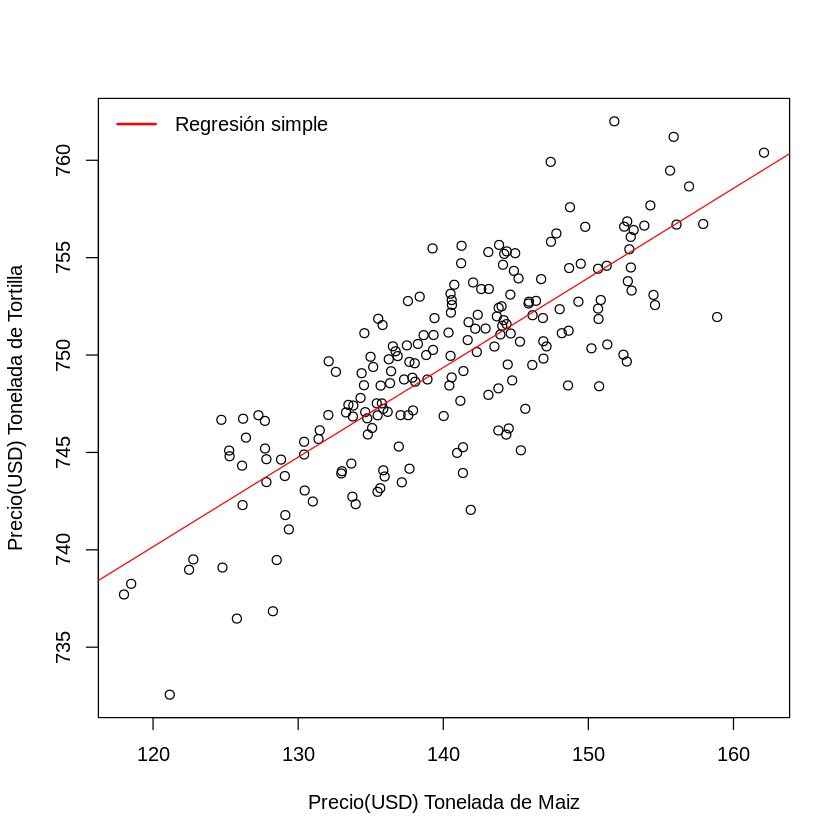

In [ ]:
#Función que calcula los coeficientes por minimos cuadrados
minimos <- function(x,y){
        mean_x <- mean(x)
        mean_y <- mean(y)
        y1 <- (x-mean_x)*(y-mean_y)
        y2 <- (x-mean_x)^2
        beta1 <- sum(y1)/sum(y2)
        beta0<-mean_y-beta1*mean_x
        return(c(beta0,beta1))
}

#Calculamos los coeficientes para los datos del maiz
coef <- minimos(ma,tor)

#Graficamos los datos y la recta de regresión
plot(ma,tor, xlab = "Precio(USD) Tonelada de Maiz", 
ylab = "Precio(USD) Tonelada de Tortilla")
abline(coef[1],coef[2], col="red")
legend("topleft",
legend = c("Regresión simple"),lwd = 2, 
col = c("red"), lty = c(1,1),bty = "n")

In [ ]:
coef 

[1] 684.9545215   0.4600343

## ANOVA

Con las expresiones vistas en clase se pueden calcular los p-valores bajo el supuesto de normalidad intrínseca a la regresión lineal. 

In [ ]:
tortilla.maiz.lm <- lm(Tortilla ~ Maiz, data = data_maiz)
summary(tortilla.maiz.lm)


Call:
lm(formula = Tortilla ~ Maiz, data = data_maiz)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1793 -2.0014  0.3592  2.0617  7.2170 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 684.95452    3.47763   197.0   <2e-16 ***
Maiz          0.46003    0.02473    18.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.988 on 198 degrees of freedom
Multiple R-squared:  0.6361,	Adjusted R-squared:  0.6342 
F-statistic:   346 on 1 and 198 DF,  p-value: < 2.2e-16


Se cumplen las siguientes fórmulas
$$
\widehat{\text{se}}(\widehat{\beta}_0)=\frac{\widehat{\sigma}}{s_X\sqrt{n}}\sqrt{\frac{\sum_{i=1}^n X_i^2}{n}},
$$
y
$$
\widehat{\text{se}}(\widehat{\beta}_1)=\frac{\widehat{\sigma}}{s_X\sqrt{n}}.
$$

El estadistico de prueba bajo la hipótesis de normalidad para cada coeficiente bajo la hipótesis $H_0: \beta_i=0$ es  
$$
t(\beta_1)=\frac{\hat{\beta}_1}{\widehat{\text{se}}(\widehat{\beta}_1)}\sim t_{n-2},
$$
y
$$
t(\beta_0)=\frac{\hat{\beta}_0}{\widehat{\text{se}}(\widehat{\beta}_0)}\sim t_{n-2}.
$$

## Regresión No Paramétrica (Nadayara-Watson)

Este es un método tipo kernel, la intuición aquí es transformar los datos de forma que el supuesto de linealidad sea más plausible. 

[1] 3.146443

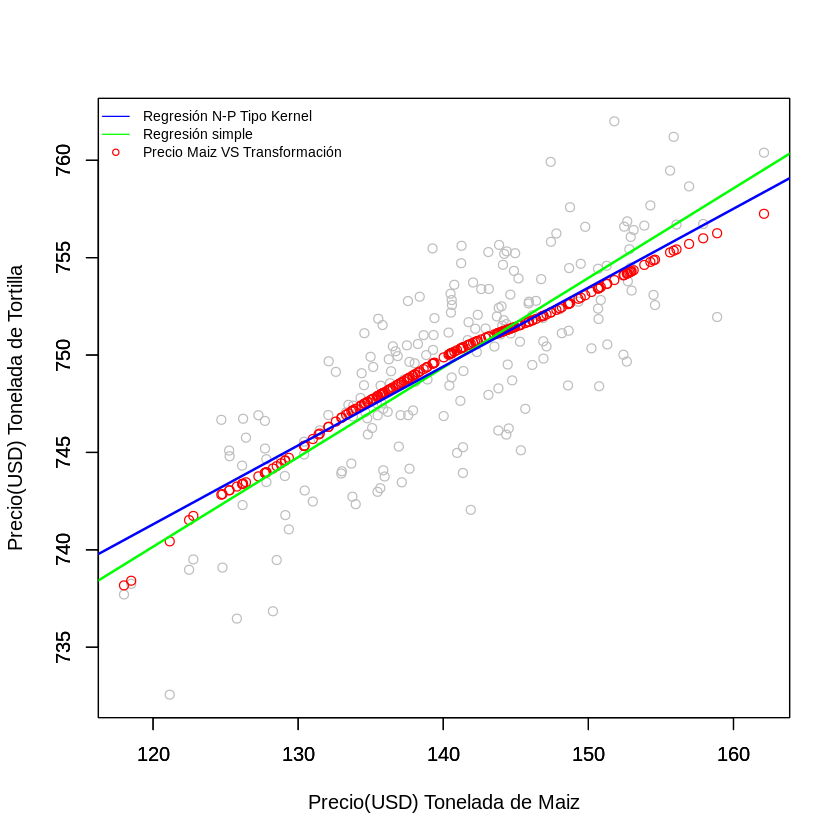

In [ ]:
#Kernel Gaussiano
gauss <- function(x){ (1/sqrt(2*pi))*exp(-x^2/2)}

#Funcion para realizar la transformacion a los valores de y
#data: datos a utilizar
#x: valor en el que se evalua
#h: bandwidth
# Kernel a utilizar(como funcion)
y_n<-function(data,x,h,kernel){
        ma<- data[,1]
        tor<-data[,2]
        y1<-sapply(x, function(j){
                sum(sapply(data,function(i){ kernel((j-i)/h)}))
        })
        y2 <- sapply(x, function(j){sum(sapply(1:length(ma),function(i){tor[i]*kernel((j-ma[i])/h)}) )})
        return(y2/y1)
}

#Valor de h optimo 
h<-1.06*sd(ma)*length(ma)^(-1/5)
h
#Transformacion 
yn <- y_n(data_maiz,ma,h,gauss)

#Coeficientes para los datos de la transformacion
coef2 <- minimos(ma,yn)

#Coeficientes para los datos de la transformacion
coef2 <- minimos(ma,yn)
#Graficamos
plot(ma,tor, xlim = c(min(ma),max(ma)),col="gray", ylim = c(min(tor), max(tor)), xlab = "", ylab = "")
par(new=T)
plot(ma,yn,xlim = c(min(ma),max(ma)),col="red", ylim = c(min(tor), max(tor)), xlab = "Precio(USD) Tonelada de Maiz", 
ylab = "Precio(USD) Tonelada de Tortilla")
abline(coef[1], coef[2], col="green",lwd = 2)
abline(coef2[1], coef2[2], col="blue",lwd = 2)
#legend("topleft", legend = c("Regresión N-P Tipo Kernel", "Precio Maiz VS Transformación"),
#lwd = 2, col = c("blue", "red"), pch = c(NA,1),lty = c(1,NA),bty = "n")
legend("topleft", legend = c("Regresión N-P Tipo Kernel","Regresión simple", 
"Precio Maiz VS Transformación"),lwd = 1, col = c("blue","green", "red"), 
pch = c(NA,NA,1),lty = c(1,1,NA),bty = "n", cex = 0.7)